# P3 - Analyse et prédiction de données Covid-19

# Introduction

Depuis le début de la crise sanitaire de Covid-19 en 2020, nous avons connu un grand changement dans nos vies quotidiennes. Les routines ont changé, ainsi que notre de travailler, ou encore d'interagir et même de nous comporter. Chaque jour, un grand nombre de données relatives au Covid-19 sont collectées sur le nombre de patients infectés, testés, décédés, guéris ou vaccinés. Les données sur les différentes mutations et les différents vaccins dans tous les pays du monde sont soigneusement collectées et pas toujours analysées ou visualisées de manière à pouvoir tirer certaines conclusions.

TODO agrandir l'introduction

Dans ce projet, l'objectif est donc de collecter et analyser les données Covid-19 pour différents pays et régions. Nous ferons des analyses statistiques et proposerons différentes méthodes de visualisation. En outre, nous essaierons de faire des prédictions en utilisant certains des outils et modules fournis par Python.

Ce projet se découpe donc en trois grandes parties : récupération de données, visualisation des données récupérées, ainsi que prédictions des futurs évènements.

## Récupération de données

Au début du projet, il faudra chercher et choisir une bases de données viable et libre d'accès pour entrainer le modèle de machine learning. Il faudra ensuite choisir les données à traiter, ainsi que mettre en place un manière de traiter les données récoltées.

## Visualisation des données

Par la suite, il faudra chercher, choisir et représenter les données sous la forme la plus adaptée et compréhensible possible (graphiques, diagrammes, ...). Par la suite, il sera nécessaire de choisir les différents paramètres pris en compte pour l'affichage des données (catégorie, temporalité, ...). 
Pour cela, il faudra au préalable prendre en main des outils de visualisation tels que Pandas ou Seaborn.

## Analyse de données et prédictions

Enfin, il faudra chercher, comparer, choisir et tester le/les modèle(s) de machine learning utilisé(s) permettant la prédiction du nombre de nouveaux morts chaque jour. Pour cela, il faudra au préalable prendre en main des outils de machine learning tels que Scikit-learn. Pour finir, le nombre de nouveaux morts chaque jour devra être affiché en rapport aux données récoltées au préalable.

## Bibliothèques utilisées

Visualisation: 
- Matplotlib: Diagrammes simples et compréhensifs
- Seaborn: Diagrammes complex et complets
- Plotly: Diagrammes interactifs

Représentation:
- Numpy: Représentation simpliste des données
- Pandas: Représentation des données sous forme de tableau labélisé

Machine learning:
- Scikit-learn: Modèles de machine learning, évaluation des modèles, mise en forme des données

In [81]:
import sys 
sys.dont_write_bytecode = True # Stop creating __pycache__ folder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from toolbox import * # My own toolbox

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Etat de l'art

TODO

Etat de l'art

Domaines dans lesquels on pourrait utiliser aussi ce projet

# Récupération des données

Our World In Data est un site internet recensant un nombre impressionnant de données sur tout type de sujets à travers le monde. Les publications présentent sur le site sont dirigées par l'université d'Oxford et rédigées par l'historien social et économiste du développement Max Roser.

Ce site internet met à disposition une base de données accessible via GitHub: https://github.com/owid/covid-19-data/tree/master/public/data, ou directement sur leur site internet: https://ourworldindata.org/coronavirus.

Il y a à disposition plusieurs formats afin de récupérer cette base de données: csv, xlsx ou json. Json étant un format plus simple de compréhension, c'est celui que j'ai choisi de traiter. Cette base de données est tenue à jour et est actualisée chaque jour, ainsi les données traitées dans ce projet seront toujours actualisées.

Grâce à la bibliothèque Pandas, on peut récupérer les données en passant l'url de recherche à la méthode `read_json`. 

In [82]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.json'
json = pd.read_json(url)

Une fois les données récoltées, il va falloir les traiter afin d'en extraire les parties importantes et utiles. 

Dans le cadre de ce projet, nous allons traiter les données relatives à la Suisse, en utilisant donc l'ISO `CHE`. Les données Covid de chaque jour, se trouvent ensuite dans la partie `data` de la base de données. 

On peut voir avec `tail`, que les données sont bien actualisées chaque jour. On peut aussi voir la forme des données, ainsi que les différentes informations contenues dans cette base de données. En effet, 45 données sont récoltées chaque jour en Suisse, ce nombre peut être différent en fonction du pays que l'on souhaite traiter.

In [83]:
data = json['CHE']['data']
df = pd.DataFrame(data)
df.tail()

,date,total_cases,new_cases,total_cases_per_million,new_cases_per_million,stringency_index,new_cases_smoothed,new_cases_smoothed_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,total_boosters,total_boosters_per_hundred
681,2022-01-06,1455174.0,32242.0,166964.030,3699.389,44.44,20220.857,2320.105,619.0,71.023,...,162.69,68.73,67.11,85608.0,50477.0,5792.0,2224.0,0.026,2466355.0,28.30
682,2022-01-07,1483212.0,28038.0,170181.059,3217.029,44.44,21513.857,2468.461,590.0,67.696,...,163.69,68.77,67.17,87234.0,60285.0,6917.0,2714.0,0.031,2542124.0,29.17
683,2022-01-08,1483212.0,0.0,170181.059,0.000,44.44,21513.857,2468.461,NaN,NaN,...,164.26,68.83,67.21,49463.0,67165.0,7706.0,3478.0,0.040,2582285.0,29.63
684,2022-01-09,1483212.0,0.0,170181.059,0.000,NaN,21513.857,2468.461,NaN,NaN,...,164.53,68.86,67.22,23339.0,69681.0,7995.0,3804.0,0.044,2602382.0,29.86
685,2022-01-10,1546877.0,63665.0,177485.866,7304.807,NaN,25116.429,2881.814,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dans cette base de données, se trouvent aussi quelques informations à propos de chaque pays: le continent, la population, l'age médian, le nombre de lits d'hopitaux ... Toutes ces informations ne seront pas utilisées dans le cadre de ce projet, mais peuvent avoir une importance lors de la comparaison entre les données de différents pays.

In [84]:
for key, value in json['CHE'].items(): 
	if key != 'data':
		print(f"{key}: {value}")

print(f"\n\nData gathered on {len(df)} days, from {df['date'][0]} to {df['date'][len(df) - 1]}.")

continent: Europe
location: Switzerland
population: 8715494.0
population_density: 214.243
median_age: 43.1
aged_65_older: 18.436
aged_70_older: 12.644
gdp_per_capita: 57410.166
cardiovasc_death_rate: 99.739
diabetes_prevalence: 5.59
handwashing_facilities: nan
hospital_beds_per_thousand: 4.53
life_expectancy: 83.78
human_development_index: 0.9550000000000001
extreme_poverty: nan
female_smokers: 22.6
male_smokers: 28.9


Data gathered on 686 days, from 2020-02-25 to 2022-01-10.


# Prétraitement

Dû à la grande taille de la base de données, ces données brutes sont généralement de faible qualité. Elles peuvent être incomplètes (valeurs manquantes), bruitées (valeurs erronées ou aberrantes) ou incohérentes (divergence entre attributs). Il est donc nécessaire d'effectuer un prétraitement sur ces données, d’améliorer la qualité des données.

Dans cette partie, on va donc modifier, travailler les données à disposition grâce à Pandas, afin de supprimer les parties inutilisées, d'uniformiser les données ... 

Etant donné que l'intégralité du projet se trouve dans ce notebook, il est vivement recommandé de ne jamais travaillé directement sur le dataframe collecté, mais de passer par des copies pour pouvoir à tout moment récupérer les données brutes.

In [85]:
df_proc = df

## Suppression des colonnes redondantes

Dans la base de données se trouvent des colonnes redondantes, colonnes n'apportant aucune nouvelle informations telles que le nombre de nouveaux cas par millions d'habitants, le nombre de cas lissé, ... Toutes ces colonnes ne seront pas utiles pour entraîner les modèles de machine learning, il faut donc les supprimer. ²

In [86]:
df_proc = df_proc.drop(list(df_proc.filter(regex='smoothed|million|hundred|thousand')), axis=1)
print(df_proc.columns)

Index(['date', 'total_cases', 'new_cases', 'stringency_index',
       'weekly_hosp_admissions', 'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative', 'excess_mortality', 'total_deaths',
       'new_deaths', 'reproduction_rate', 'icu_patients', 'hosp_patients',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations', 'total_boosters'],
      dtype='object')


## Analyse des NaN (Not a Number)

Dans notre base de données, se trouve des colonnes qui sont peu remplies (case remplie avec NaN), en effet les données collectées sur ces sujets n'ont pas été récupérées tous les jours, ou n'ont pas été collectées depuis le début de l'épidémie.

En effet, on peut voir sur le graphique ci-dessous le taux de données non répertoriées (en beige) pour chacune des colonnes de la base de données. Certaines données ne sont pas récoltées chaque jour (ex: weekly hosp admissions), et d'autres n'ont commencé à être récoltées qu'un certains temps après le début de la pandémie (ex: new vaccinations).

<AxesSubplot:>

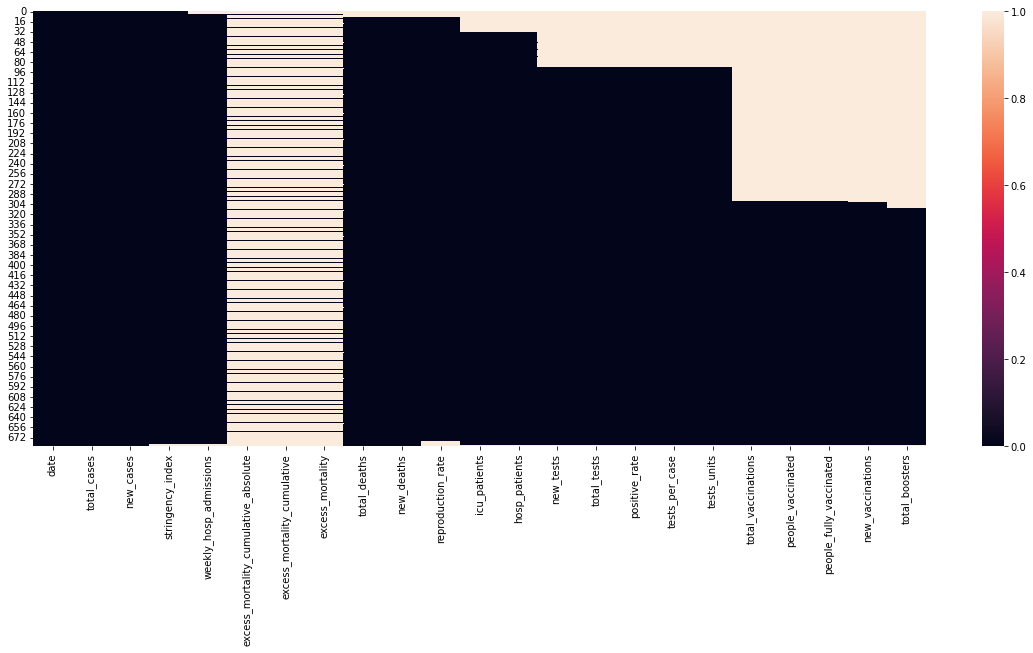

In [87]:
plt.figure(figsize=(20,8))
sns.heatmap(df_proc.isna())

Voici aussi, sous forme textuelle, le schéma présent ci-dessus:

In [88]:
# Trie des différentes données pour voir lesquelles possèdent le plus de NaN
missing_rate = df_proc.isna().sum() / df_proc.shape[0]
print("Missing rate:")
print(round(missing_rate.sort_values(ascending=False), 3))

Missing rate:
excess_mortality_cumulative_absolute    0.862
excess_mortality_cumulative             0.862
excess_mortality                        0.862
total_boosters                          0.455
new_vaccinations                        0.440
people_fully_vaccinated                 0.439
people_vaccinated                       0.439
total_vaccinations                      0.439
new_tests                               0.130
tests_units                             0.130
tests_per_case                          0.130
positive_rate                           0.130
total_tests                             0.130
icu_patients                            0.051
hosp_patients                           0.051
reproduction_rate                       0.025
new_deaths                              0.015
total_deaths                            0.015
weekly_hosp_admissions                  0.012
stringency_index                        0.003
total_cases                             0.000
new_cases           

Les données étant collectées que depuis moins de 2 ans, la base de données mise à disposition est donc de faible taille. Il a donc fallu garder un maximum de colonnes, sans pour autant fausser les résultats pouvant se baser sur une partie trop importante de données manquantes. J'ai donc choisi de ne travailler que sur les colonnes contenant au moins 50% de données depuis le début de l'épidémie. Voici donc les différentes données restantes récoltées chaque jour disponibles après ce deuxième traitement:

In [89]:
# Suppression des colonnes qui ont moins de 50% des données
df_proc = df_proc.drop(df_proc.columns[missing_rate > 0.5], axis=1)
print(df_proc.columns)

Index(['date', 'total_cases', 'new_cases', 'stringency_index',
       'weekly_hosp_admissions', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'total_boosters'],
      dtype='object')


## Analyse de forme

Etant donné que le but du projet est de prédire le nombre de nouveaux morts par jour, nous allons travailler sur des modèles de machine learning basés sur la régression: prédire un nombre le plus proche de la réalité possible. Il est donc nécessaire de travailler sur des données sous formes numériques, ainsi vérifions le type de données présentes.

On doit tout de même garder la colonne `date` sous forme non-numérique, car cette colonne deviendra par la suite l'indice du tableau.

tests_units------------------- ['-' 'tests performed']


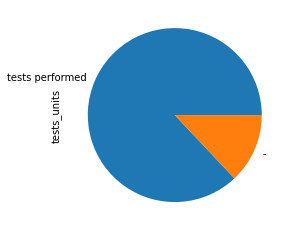

In [90]:
for col in df_proc.select_dtypes('object'):
	if col != 'date':
		df_proc[col] = df_proc[col].fillna('-')
		plt.figure()
		df_proc[col].value_counts().plot.pie()
		print(f'{col :-<30} {df_proc[col].unique()}')

La colonne `tests_units` n'est pas sous forme numérique, il faut donc la supprimer de nos données. Pour ce faire on supprime donc toutes les colonnes qui sont sous la forme object, cependant cette méthode supprime aussi la colonne `date`, il faudra donc la rajouter par la suite, mais pour l'instant la supprimer aussi n'a pas d'importance. Voici donc les différentes données restantes récoltées chaque jour disponibles après ce troisième traitement:

In [91]:
df_proc = df_proc.select_dtypes(exclude=['object'])
print(df_proc.columns)

Index(['total_cases', 'new_cases', 'stringency_index',
       'weekly_hosp_admissions', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'total_boosters'],
      dtype='object')


## Analyse des corrélations

Afin de supprimer les colonnes ne permettant pas d'aider le modèle de machine learning à mieux prédire le nombre de morts chaque jour, il est nécessaire d'effectuer une analyse de corrélation entre les différentes informations contenues dans la base de données. La corrélation mesure une dépendance linéaire entre deux variables. L'analyse de corrélation permet donc d’étudier la dépendance entre le nombre de morts chaque jour et les autres informations à disposition non supprimées jusqu'ici.

On peut représenter ces corrélations grâce à une matrice de corrélation.

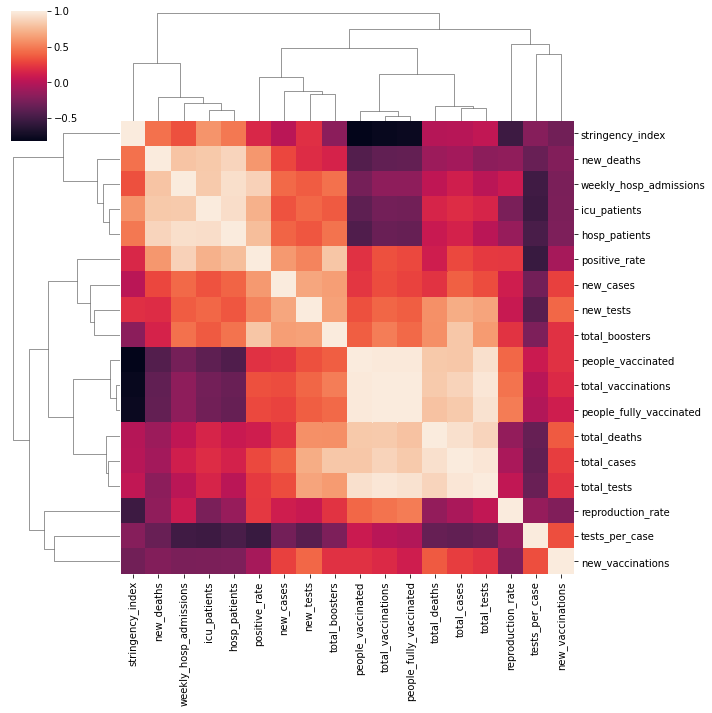

In [92]:
sns.clustermap(df_proc.corr())

Il est seulement nécessaire de se focaliser sur les corrélations en rapport avec ce qui sera prédit: `new_deaths`.

In [93]:
correlations = df_proc.corr()['new_deaths']
print("Correlations to new_deaths:")
print(round(correlations.sort_values(ascending=False), 3))

Correlations to new_deaths:
new_deaths                 1.000
hosp_patients              0.891
icu_patients               0.831
weekly_hosp_admissions     0.816
positive_rate              0.612
stringency_index           0.459
new_cases                  0.300
new_tests                  0.198
total_boosters             0.148
total_cases               -0.080
total_deaths              -0.108
reproduction_rate         -0.155
total_tests               -0.173
new_vaccinations          -0.214
tests_per_case            -0.325
people_fully_vaccinated   -0.347
total_vaccinations        -0.358
people_vaccinated         -0.423
Name: new_deaths, dtype: float64


Plus le coefficient de corrélation est proche des valeurs extrêmes -1 et 1, plus la corrélation linéaire entre les variables est forte. On ne souhaite donc garder que les colonnes ayant une corrélation absolue avec `new_deaths` supérieure à 0.7.

![](https://i.imgur.com/VcJvg8V.png)

>http://www.sthda.com/french/wiki/test-de-correlation-formule

In [94]:
# On supprime les colonnes ayant une corrélation absolue inférieure à 0.7
df_proc = df_proc.drop(df_proc.columns[abs(correlations) < 0.7], axis=1)

# On rajoute la colonne date que l'on a supprimé dans l'analyse de forme, et qui n'était pas utile dans l'analyse de correlations.
df_proc['date'] = df['date']

Voici donc les colonnes qui seront utilisées pour l'entraînement des modèles de machine learning.

In [95]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekly_hosp_admissions  678 non-null    float64
 1   new_deaths              676 non-null    float64
 2   icu_patients            651 non-null    float64
 3   hosp_patients           651 non-null    float64
 4   date                    686 non-null    object 
dtypes: float64(4), object(1)
memory usage: 26.9+ KB


## Mise en forme

Une fois les colonnes utiles sélectionnées, il est nécessaire d'effectuer une mise en forme des données disponibles car un certains nombre de données ne sont pas représentées, ou sont négatives or c'est tout simplement impossible.

On peut donc voir ci-après les différentes informations disponibles en fonction du temps qui seront utiles:

In [96]:
for column in df_proc.columns:
  if column == 'date':
    continue

  fig = go.Figure([go.Scatter(x=df_proc['date'], y=df_proc[column])])
  fig.update_layout(
    title={
      'text': column,
      'xanchor': 'center',
      'yanchor': 'top'
    },
    xaxis_title='date',
    yaxis_title=column,
  )
  fig.show()

En observant attentivement le schéma du nombre de nouveaux morts chaque jour, il est possible d'apercevoir une saisonnalité, particularité que l'on ne retrouve que sur ce graphe. En effet, chaque week-end, le nombre de morts n'est pas forcément remplit, cela est flagrant entre octobre 2021 et janvier 2022: le nombre de morts chaque week-end est presque tout le temps nul. En revanche, j'en conclu que les données doivent être forcément reportées sur un jour suivant, par exemple le lundi ou le mardi, or ce n'est pas très visible sur ce graphe. 

TODO sure ?

Cette saisonnalité est un réel problème dans cette base de données, car à conditions égales et en fonction du jour de la semaine, les données rapportées ne seront pas les mêmes. J'ai donc choisit de directement supprimer l'intégralité des week-ends de la base de données afin de ne pas induir le modèle de machine learning en erreur.

Des autres approches auraient pu être: de rajouter le jour dans une nouvelle colonne de la base de données, mais cette solution n'est pas assez prise en compte par le modèle de machine learning. Ou encore de remplacer le nombre de morts du week-end par la moyenne pondérée des jours précédents et suivants, or le but est de prédire des données, il est n'est donc pas viable de n'utiliser seulement les données des jours précédents.

TODO pas ouf comme explication

In [97]:
# Remove week-ends
df_proc['date'] = pd.to_datetime(df_proc['date'])
df_proc = df_proc.drop(df_proc[df_proc['date'].dt.day_name() == 'Saturday'].index)
df_proc = df_proc.drop(df_proc[df_proc['date'].dt.day_name() == 'Sunday'].index)

# TODO Remove or use another way
# Add weekday number to data
# df_proc['date'] = pd.to_datetime(df_proc['date'])
# df_proc['weekday'] = df_proc['date'].dt.dayofweek

On veut maintenant pouvoir remplir les données qui ne sont pas représentées. Pour ce faire, j'ai choisi de récupérer la valeur la plus proches pour chaque donnée manquante et remplir la base données avec ces informations. Cela permet de ne pas avoir de saut de données tout en gardant un maximum de données réelles pour entrainer le modèle de machine learning.

Une fois les données manquantes remplies, il faut supprimer les donnnées négatives car il est impossible qu'un nombre de morts soit négatif par exemple.

In [98]:
# Fill all the NaN values with nearest value
df_proc = df_proc.fillna(method="bfill").fillna(method="ffill")
print(f"Any NaN remaining: {df_proc.isnull().sum().any()}")

# Remove rows with negative values because it's not possible
df_proc = df_proc[df_proc.select_dtypes(include=[np.number]).ge(0).all(1)] 

Any NaN remaining: False


In [99]:
for column in df_proc.columns:
  if column == 'date' or column == 'weekday':
    continue

  fig = go.Figure([go.Scatter(x=df_proc['date'], y=df_proc[column])])
  fig.update_layout(
    title={
      'text': column,
      'xanchor': 'center',
      'yanchor': 'top'
    },
    xaxis_title='date',
    yaxis_title=column,
  )
  fig.show()

Le problème avec ce remplissage des données est que pour les colonnes `hosp_patients` et `icu_patients` ce remplissage n'est pas bien réalisé et ne peut pas être effectué simplement. Ces informations n'ont pas été récoltées depuis le début de la crise, et poseront problème au modèle. Pour palier à ce problème, j'ai choisir de supprimer l'intégralité des données récoltées avant le 30-03-2020.

In [100]:
df_proc = df_proc.loc[(df_proc['date'] >= '2020-03-30')]

In [101]:
for column in df_proc.columns:
  if column == 'date' or column == 'weekday':
    continue

  fig = go.Figure([go.Scatter(x=df_proc['date'], y=df_proc[column])])
  fig.update_layout(
    title={
      'text': column,
      'xanchor': 'center',
      'yanchor': 'top'
    },
    xaxis_title='date',
    yaxis_title=column,
  )
  fig.show()

Comme on peut le voir sur les graphes ci-dessus, une seule valeur est vraiment abhérente compte tenu des données adjacentes, il est donc nécessaire de la supprimer. Cependant, les données sont bien trop disparate, et il n'est donc pas possible de supprimer cette donnée automatiquement. La valeur que l'on retrouve le 09-02-2020 est donc retirée manuellement, permettant ainsi de lisser les données.

In [102]:
# On veut retirer l'outlier de new_deaths du 9 février 2021
df_proc = df_proc[df_proc['date'] != '2021-02-09']

In [103]:
fig = go.Figure([
  go.Scatter(x=df_proc['date'], y=df_proc['new_deaths'])
])
fig.update_layout(
  title={
    'text': column,
    'xanchor': 'center',
    'yanchor': 'top'
  },
  xaxis_title='date',
  yaxis_title=column,
)
fig.show()

# Prédictions

## Définitions

Ces dernières années, les méthodes d'apprentissage automatique sont devenues omniprésentes dans la vie quotidienne. Des recommandations automatiques de films à regarder, de plats à commander ou de produits à acheter, la radio en ligne personnalisée ou la reconnaissance de vos amis sur vos photos, de nombreux sites Web et appareils modernes sont dotés d'algorithmes d'apprentissage automatique.

L'apprentissage automatique, aussi appelé "machine learning", est une sous-catégorie de l'intelligence artificielle qui est la capacité d'une machine à imité le comportement humain. L'intelligence artificielle est utilisée pour effectuer des tâches complexes d'une manière similaire à la façon dont les humains résolvent les problèmes.

### Types d'algorithmes

Il existe deux types d'algorithmes d'apprentissage:
- Supervisé: algorithmes qui automatisent le processus de décision en généralisant à partir d'exemples connus. Dans ce cas, l'utilisateur fournit à l'algorithme des paires d'entrées et de sorties souhaitées, et l'algorithme trouve un moyen de produire la sortie souhaitée à partir d'une entrée. En effet, l'algorithme est capable de créer une sortie pour une entrée qu'il n'a jamais vue auparavant sans aucune aide.
- Non supervisés: dans ce type d'algorithmes, seules les données d'entrée sont connues, et aucune donnée de sortie connue n'est donnée à l'algorithme. 

Dans notre cas, comme les données à prédire sont connues, nous utiliserons des algorithmes d'apprentissage supervisé.

### Types de problèmes

Dans ce type d'algorithmes, il existe deux types de problèmes d'apprentissage supervisé:
- Regression: l'objectif est de prédire un nombre continu. (Ex: prédire le prix d'une maison)
- Classification: l'objectif est de prédire une classe, qui est un choix parmi une liste prédéfinie de possibilités. (Ex: prédire la race d'un animal)

Dans notre cas, comme les données à prédire sont le nombre de nouveaux morts par jour, nous sommes dans un cas de régression.

### Caractéristique d'un modèle

Dans l'apprentissage supervisé, nous voulons construire un modèle à partir de données, et être ensuite capable de faire des prédictions précises sur de nouvelles données. Si un modèle est capable de faire des prédictions précises sur des données inconnues, on dit qu'il est capable de généraliser de l'ensemble d'apprentissage à l'ensemble de test. Nous voulons construire un modèle capable de généraliser aussi précisément que possible.

## Première approche: Régression simple en utilisant seulement la date

Maintenant que les données récoltées ont été traitées pour être utilisées au mieux, il va nous être possible de les utiliser afin d'entrainer un modèle de machine learning et de pouvoir prédire des données que nous ne connaissons pas encore. 
Dans notre cas, nous utiliserons l'apprentissage automatique afin de pouvoir prédire le nombre de nouveaux morts chaque jour à cause du Covid-19. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

df_used = df_proc[['date', 'new_deaths']]
df_used['date'] = df_used.index

X = df_used['date'].values.reshape(-1, 1)
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_pred = np.array(range(len(df), len(df) + 30)).reshape(-1, 1) # next month

y = df_used['new_deaths'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cv = ShuffleSplit(test_size=0.2, train_size=0.8)
scoring = 'r2'
njobs = -1 # njobs for the number of CPU cores used

<ipython-input-27-225016eb93d5>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Linear Models


### Ordinary Least Squares

In [28]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([("scaler", MinMaxScaler()), ("linear", LinearRegression())])

param_grid = {}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs) 
grid = grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Linear")

Best parameters: {}
Training set score: 0.01
Test set score: 0.02


### Ridge regression

In [29]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([("scaler", MinMaxScaler()), ("ridge", Ridge())])

param_grid = {
	'ridge__alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Ridge")

Best parameters: {'ridge__alpha': 10}
Training set score: 0.01
Test set score: 0.01


### Lasso

In [30]:
from sklearn.linear_model import Lasso

pipeline = Pipeline([("scaler", MinMaxScaler()), ("lasso", Lasso())])

param_grid = {
	'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Lasso")

Best parameters: {'lasso__alpha': 0.001}
Training set score: 0.01
Test set score: 0.02


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

param_grid = {
	'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Logistic")

Best parameters: {'logistic__C': 100}
Training set score: -0.41
Test set score: -0.51


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Naive Bayes Classifiers

### Gaussian

In [32]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([("scaler", MinMaxScaler()), ("gaussian", GaussianNB())])

param_grid = {}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Gaussian")

Best parameters: {}
Training set score: 0.23
Test set score: -0.46


### Multinomial

In [33]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([("scaler", MinMaxScaler()), ("multinomial", MultinomialNB())])

param_grid = {
	'multinomial__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train[:, 0], X_test[:, 0], X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Multinomial")

Best parameters: {'multinomial__alpha': 0.0001}
Training set score: -0.46
Test set score: -0.57


## K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsRegressor())])

param_grid = {
	'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Knn")

Best parameters: {'knn__n_neighbors': 6}
Training set score: 0.96
Test set score: 0.94


## Decision Trees

### Simple Decision Trees

In [35]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("tree", DecisionTreeRegressor())])

param_grid = {
	'tree__criterion': ["squared_error", "absolute_error", "poisson", "friedman_mse"], 
	'tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Decision tree")

Best parameters: {'tree__criterion': 'friedman_mse', 'tree__max_depth': 5}
Training set score: 0.97
Test set score: 0.94


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.00329761 0.01008115
 0.01230742 0.01537286 0.01315105 0.01627643 0.01992991 0.01846456
 0.08086089 0.09674982 0.91566358 0.09041775 0.72579724 0.88807025
 0.92244265 0.92733765 0.92586259 0.9233151  0.92229743 0.92062888
 0.91852395 0.91544832]



### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("forest", RandomForestRegressor())])

param_grid = {
	'forest__criterion': ["squared_error", "absolute_error", "poisson"], 
	'forest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
	'forest__n_estimators': [1, 5, 10, 50, 100, 500, 1000]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Random forest")

Best parameters: {'forest__criterion': 'poisson', 'forest__max_depth': 10, 'forest__n_estimators': 10}
Training set score: 0.60
Test set score: 0.52


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan  

### Gradient Boosted Trees

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("gradient_boosting", GradientBoostingRegressor())])

param_grid = {
	'gradient_boosting__criterion': ["squared_error", "friedman_mse"], 
	'gradient_boosting__loss': ["squared_error", "absolute_error", "huber", "quantile"], 
	'gradient_boosting__n_estimators': [1, 5, 10, 50, 100, 500, 1000], 
	'gradient_boosting__learning_rate': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "Gradient boosted trees")

Best parameters: {'gradient_boosting__criterion': 'friedman_mse', 'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__loss': 'huber', 'gradient_boosting__n_estimators': 50}
Training set score: 0.97
Test set score: 0.94


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [             nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              n

## Support Vector Regression

In [38]:
from sklearn.svm import SVR

pipeline = Pipeline([("scaler", MinMaxScaler()), ("svr", SVR())])

param_grid = {
	'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
	'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "SVR")

Best parameters: {'svr__C': 100, 'svr__gamma': 1000}
Training set score: 0.96
Test set score: 0.94


## Multi-Layer Perceptrons (Deep Learning)

In [39]:
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPRegressor())])

param_grid = {
	'mlp__hidden_layer_sizes': [1, 10, 100], 
	'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
	'mlp__solver': ['lbfgs', 'sgd'],
	'mlp__max_iter': [10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
scatter_plot_squeeze(X_train, X_test, X_range, X_pred, y_train, y_test, grid.predict(X_range), grid.predict(X_pred), "MLP")

Best parameters: {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': 100, 'mlp__max_iter': 100, 'mlp__solver': 'lbfgs'}
Training set score: 0.71
Test set score: 0.63


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



# Testing machine learning models with multiple features to predict every day new deaths

In [40]:
df_used = df_proc
df_used = df_used.set_index('date')

Décaler les y vers la gauche pour pouvoir prédire sur le mois d'après

Knn pour prédire la forme des features, et ensuite utiliser ces features approximée pour approximer la feature à prédire

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

X_train = df_used[:'2021-09'].drop(['new_deaths'], axis = 1)
y_train = df_used.loc[:'2021-09', 'new_deaths']

X_test = df_used['2021-10':].drop(['new_deaths'], axis = 1)
y_test = df_used.loc['2021-10':, 'new_deaths']

y_baseline = df_used.loc['2021-10':, 'new_deaths'].shift(periods=1) # On prend à chaque fois la valeur de la veille, seulement sur la partie prédiction
y_baseline = y_baseline.fillna(0)

cv = TimeSeriesSplit(n_splits=10)
scoring = 'r2'
njobs = -1

## K-Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsRegressor())])

param_grid = {
	'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Knn")

Best parameters: {'knn__n_neighbors': 3}
Training set score: 0.98
Test set score: 0.06
r2: 0.06, baseline: -0.07
Mean Absolute Error (MAE): 10.70, baseline: 10.14
Mean Square Error (MSE): 192.27, baseline: 218.86
Root Mean Square Error (RMSE): 13.87, baseline: 14.79


## Decision Trees

### Simple Decision Trees

In [43]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("tree", DecisionTreeRegressor())])

param_grid = {
	'tree__criterion': ["squared_error", "absolute_error", "poisson", "friedman_mse"], 
	'tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Decision tree")

Best parameters: {'tree__criterion': 'friedman_mse', 'tree__max_depth': 4}
Training set score: 0.97
Test set score: 0.36
r2: 0.36, baseline: -0.07
Mean Absolute Error (MAE): 8.36, baseline: 10.14
Mean Square Error (MSE): 131.86, baseline: 218.86
Root Mean Square Error (RMSE): 11.48, baseline: 14.79


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan -172.63136559 -158.11800145 -144.92905491
 -111.22355539  -87.21915211  -78.45403883  -59.04761796  -41.86097013
  -31.04263743  -32.34539412  -15.61103354  -24.5997498   -43.31216813
   -8.13167575   -5.32746267  -31.59649732  -13.20570832  -26.63648878
   -5.82427485   -9.88839487   -6.43545973  -20.14792621]



### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("forest", RandomForestRegressor())])

param_grid = {
	'forest__criterion': ["squared_error", "absolute_error", "poisson"], 
	'forest__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
	'forest__n_estimators': [1, 5, 10, 50, 100, 500, 1000]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Random forest")

Best parameters: {'forest__criterion': 'poisson', 'forest__max_depth': 10, 'forest__n_estimators': 10}
Training set score: 0.81
Test set score: -0.35
r2: -0.35, baseline: -0.07
Mean Absolute Error (MAE): 11.74, baseline: 10.14
Mean Square Error (MSE): 276.62, baseline: 218.86
Root Mean Square Error (RMSE): 16.63, baseline: 14.79


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan    

### Gradient Boosted Trees

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("gradient_boosting", GradientBoostingRegressor())])

param_grid = {
	'gradient_boosting__criterion': ["squared_error", "friedman_mse"], 
	'gradient_boosting__loss': ["squared_error", "absolute_error", "huber", "quantile"], 
	'gradient_boosting__n_estimators': [1, 5, 10, 50, 100, 500, 1000], 
	'gradient_boosting__learning_rate': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "Gradient boosted trees")

Best parameters: {'gradient_boosting__criterion': 'friedman_mse', 'gradient_boosting__learning_rate': 1, 'gradient_boosting__loss': 'huber', 'gradient_boosting__n_estimators': 5}
Training set score: 0.98
Test set score: 0.31
r2: 0.31, baseline: -0.07
Mean Absolute Error (MAE): 8.84, baseline: 10.14
Mean Square Error (MSE): 142.00, baseline: 218.86
Root Mean Square Error (RMSE): 11.92, baseline: 14.79


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [             nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              nan
              nan              nan              nan              n

## Support Vector Regression

In [46]:
from sklearn.svm import SVR

pipeline = Pipeline([("scaler", MinMaxScaler()), ("svr", SVR())])

param_grid = {
	'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
	'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "SVR")

Best parameters: {'svr__C': 100, 'svr__gamma': 1}
Training set score: 0.97
Test set score: 0.51
r2: 0.51, baseline: -0.07
Mean Absolute Error (MAE): 7.11, baseline: 10.14
Mean Square Error (MSE): 100.15, baseline: 218.86
Root Mean Square Error (RMSE): 10.01, baseline: 14.79


## Multi-Layer Perceptrons (Deep Learning)

In [47]:
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPRegressor())])

param_grid = {
	'mlp__hidden_layer_sizes': [1, 10, 100], 
	'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
	'mlp__solver': ['lbfgs', 'sgd'],
	'mlp__max_iter': [10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
regression_results(y_test.values, grid.predict(X_test), y_baseline)
scatter_plot(X_train.index, X_test.index, X_train.index, X_test.index, y_train, y_test, grid.predict(X_train), grid.predict(X_test), y_baseline, "MLP")

Best parameters: {'mlp__alpha': 1, 'mlp__hidden_layer_sizes': 100, 'mlp__max_iter': 100, 'mlp__solver': 'lbfgs'}
Training set score: 0.97
Test set score: 0.52
r2: 0.52, baseline: -0.07
Mean Absolute Error (MAE): 6.95, baseline: 10.14
Mean Square Error (MSE): 99.15, baseline: 218.86
Root Mean Square Error (RMSE): 9.96, baseline: 14.79


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



# Décalage des features pour faire de la prédiction

In [48]:
df_used = df_proc
df_used = df_used.set_index('date')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta

days = 14

# TODO lui donner aussi le nombre de morts des jours précédents, possible ?

last_date = df_used.index[-1]
new_date = df_used.index[-1] + timedelta(days=1)

date_range = pd.date_range(new_date, periods=days, freq='D')
days_to_predict = pd.DataFrame({'date': date_range}) 
days_to_predict = days_to_predict.set_index('date')

df_pred = df_used.append(days_to_predict)

X_train = df_pred.shift(periods=days)[:last_date].drop(['new_deaths'], axis = 1).dropna()
y_train = df_pred.loc[df_pred.index[days]:last_date, 'new_deaths']

X_pred = df_pred.shift(periods=days)[new_date:].drop(['new_deaths'], axis = 1)

cv = TimeSeriesSplit(n_splits=10)
scoring = 'r2'
njobs = -1

In [50]:
from sklearn.neural_network import MLPRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("mlp", MLPRegressor())])

param_grid = {
	'mlp__hidden_layer_sizes': [1, 10, 100], 
	'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 
	'mlp__solver': ['lbfgs', 'sgd'],
	'mlp__max_iter': [10, 100]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=njobs)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Training set score: {grid.score(X_train, y_train):.2f}")

fig = go.Figure([
    go.Scatter(x=X_train.index, y=y_train, name='data'),
    go.Scatter(x=X_pred.index, y=grid.predict(X_pred), name='predictions')
])

fig.update_layout(
    title={
        'text': "MLP forecasting",
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Date',
    yaxis_title='New deaths'
)

fig.show()

Best parameters: {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': 10, 'mlp__max_iter': 10, 'mlp__solver': 'lbfgs'}
Training set score: 0.77


C:\Users\leon.muller\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

